In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

from processing import date_time_split_1 

In [2]:
smp = pd.read_csv('data/hourly_smp_v1.csv')
smp.head()

,datetime,smp
0,2018-02-01 01:00,116.84
1,2018-02-01 02:00,116.84
2,2018-02-01 03:00,116.84
3,2018-02-01 04:00,116.84
4,2018-02-01 05:00,116.84


In [3]:
time = smp['datetime'][48]
date = time.split(' ')[0]
hour = time.split(' ')[1].split(':')[0]

d = datetime.strptime(date, '%Y-%m-%d')
d.weekday()

5

In [4]:
time = smp['datetime']
year = []
month = []
day = []
hour_list = []
weekday = []

for time_data in time :
    date = time_data.split(' ')[0]
    hour = time_data.split(' ')[1].split(':')[0]
        
    d = datetime.strptime(date, '%Y-%m-%d')
    year.append(int(d.year))
    month.append(int(d.month))
    day.append(int(d.day))
    weekday.append(int(d.weekday()))
    
    if hour != '24' :
        hour_list.append(int(hour))
    else :
        hour_list.append(int('00'))

time_dataframe = pd.DataFrame({'year' : year,
                              'month' : month,
                               'day' : day,
                               'hour' : hour_list,
                               'weekday' : weekday})

smp = pd.concat([smp, time_dataframe], axis = 1)

In [5]:
smp

,datetime,smp,year,month,day,hour,weekday
0,2018-02-01 01:00,116.84,2018,2,1,1,3
1,2018-02-01 02:00,116.84,2018,2,1,2,3
2,2018-02-01 03:00,116.84,2018,2,1,3,3
3,2018-02-01 04:00,116.84,2018,2,1,4,3
4,2018-02-01 05:00,116.84,2018,2,1,5,3
...,...,...,...,...,...,...,...
17515,2020-01-31 20:00,151.66,2020,1,31,20,4
17516,2020-01-31 21:00,123.85,2020,1,31,21,4
17517,2020-01-31 22:00,205.89,2020,1,31,22,4
17518,2020-01-31 23:00,198.24,2020,1,31,23,4


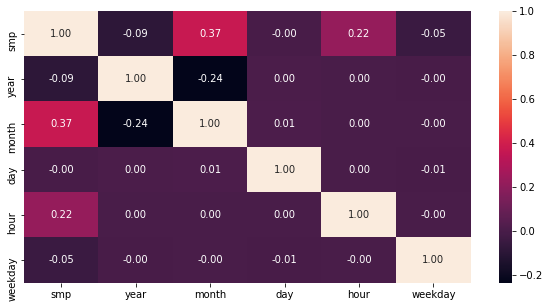

In [6]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.heatmap(smp.corr(), ax = ax, annot = True, fmt = '.2f')
plt.show()

# fill date data

In [7]:
oil = pd.read_csv('result/oil_price_du.csv')

oil = oil.iloc[:, 1:]
oil.columns = ['date', 'price']
oil = date_time_split_1(oil)
oil.sort_values(by = ['date'], inplace = True)
oil = oil[oil['date'] >= '2018-02-01']
oil.reset_index(drop = True, inplace = True)
oil.head()

,date,price,year,month,day,weekday,hour
0,2018-02-01,66.73,2018,2,1,3,0
1,2018-02-02,65.74,2018,2,2,4,0
2,2018-02-05,64.99,2018,2,5,0,0
3,2018-02-06,64.27,2018,2,6,1,0
4,2018-02-07,63.14,2018,2,7,2,0


In [8]:
oil.tail()

,date,price,year,month,day,weekday,hour
567,2020-05-05,28.94,2020,5,5,1,0
568,2020-05-06,27.35,2020,5,6,2,0
569,2020-05-07,27.14,2020,5,7,3,0
570,2020-05-08,28.54,2020,5,8,4,0
571,2020-05-11,27.27,2020,5,11,0,0


In [9]:
r = pd.date_range(start = oil.date.min(), end = oil.date.max())
oil.set_index('date').reindex(r).fillna(0.0).rename_axis('date').reset_index()

In [11]:
oil.set_index('date').reindex(r).fillna(0.0).rename_axis('date').reset_index()

,date,price,year,month,day,weekday,hour
0,2018-02-01,66.73,2018.0,2.0,1.0,3.0,0.0
1,2018-02-02,65.74,2018.0,2.0,2.0,4.0,0.0
2,2018-02-03,0.00,0.0,0.0,0.0,0.0,0.0
3,2018-02-04,0.00,0.0,0.0,0.0,0.0,0.0
4,2018-02-05,64.99,2018.0,2.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...
826,2020-05-07,27.14,2020.0,5.0,7.0,3.0,0.0
827,2020-05-08,28.54,2020.0,5.0,8.0,4.0,0.0
828,2020-05-09,0.00,0.0,0.0,0.0,0.0,0.0
829,2020-05-10,0.00,0.0,0.0,0.0,0.0,0.0
